In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#dataset
df = pd.read_csv('wat-out-big.csv',nrows = 329113)
df

,time,router,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time
0,7,0,East,Local,0x1dc0,GETS,0,3,2,8,0,0,23,7,3
1,7,1,East,Local,0xeddc0,GETS,0,3,2,8,1,1,23,7,3
2,11,2,East,West,0xeddc0,GETS,0,3,2,8,1,1,23,7,3
3,11,1,East,West,0x1dc0,GETS,0,3,2,8,0,0,23,7,3
4,15,2,East,West,0x1dc0,GETS,0,3,2,9,0,0,23,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329108,2022174,13,East,West,0x22e700,GETX,0,3,2,9,28,12,30,14,2022138
329109,2022175,13,South,West,0x222700,WB_ACK,0,3,2,10,28,12,1,1,2022166
329110,2022177,14,Local,West,0x222700,PUTS,4,2,2,8,28,12,30,14,2022137
329111,2022178,14,Local,West,0x22e700,GETX,0,3,2,9,28,12,30,14,2022138


In [3]:
df.dtypes

time               int64
router             int64
outport           object
inport            object
packet_address    object
packet_type       object
flit_id            int64
flit_type          int64
vnet               int64
vc                 int64
src_ni             int64
src_router         int64
dst_ni             int64
dst_router         int64
enq_time           int64
dtype: object

In [4]:
df.shape

(329113, 15)

In [5]:
df.describe()

,time,router,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time
count,3.291130e+05,329113.000000,329113.000000,329113.000000,329113.000000,329113.000000,329113.000000,329113.000000,329113.000000,329113.000000,3.291130e+05
mean,9.526744e+05,5.176246,1.585778,1.414222,2.584905,10.902726,15.543582,5.369277,15.449958,5.084497,9.526540e+05
std,7.201179e+05,4.825094,1.497548,0.986926,0.909780,3.700671,12.174229,5.631902,11.851005,5.436879,7.201175e+05
min,7.000000e+00,0.000000,0.000000,0.000000,2.000000,8.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+00
25%,1.418710e+05,1.000000,0.000000,1.000000,2.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.418630e+05
50%,8.625180e+05,3.000000,1.000000,1.000000,2.000000,9.000000,18.000000,2.000000,18.000000,2.000000,8.624880e+05
75%,1.753621e+06,9.000000,3.000000,2.000000,4.000000,16.000000,29.000000,13.000000,27.000000,11.000000,1.753584e+06
max,2.022179e+06,15.000000,4.000000,3.000000,4.000000,19.000000,31.000000,15.000000,31.000000,15.000000,2.022166e+06


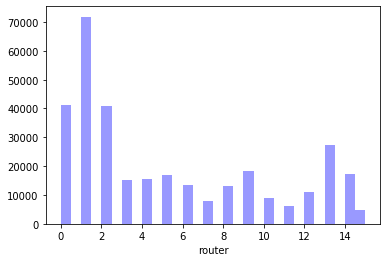

In [6]:
sns.distplot(df['router'], kde = False, bins=30, color='blue')

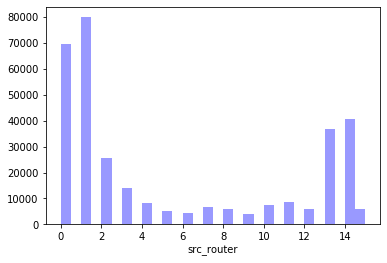

In [7]:
sns.distplot(df['src_router'], kde = False, bins=30, color='blue')

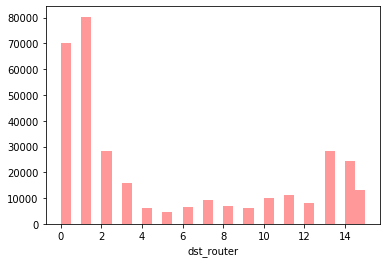

In [8]:
sns.distplot(df['dst_router'], kde = False, bins=30, color='red')

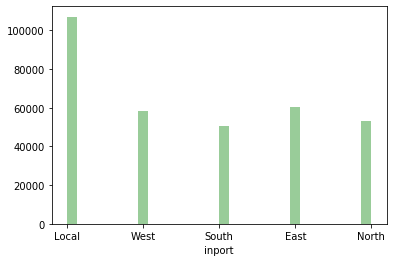

In [9]:
sns.distplot(df['inport'], kde = False, bins=30, color='green')

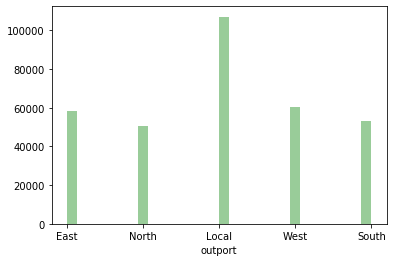

In [10]:
sns.distplot(df['outport'], kde = False, bins=30, color='green')

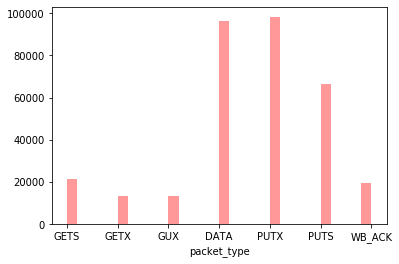

In [11]:
sns.distplot(df['packet_type'], kde = False, bins=30, color='red')

In [12]:
direction = {'Local': 0,'North': 1, 'East': 2, 'South':3,'West':4}
df = df.replace({'inport': direction, 'outport': direction})

In [13]:
data = {'GETS': 0,'GETX': 1,'GUX': 2,'DATA': 3, 'PUTX': 4,'PUTS': 5,'WB_ACK':6}
df = df.replace({'packet_type': data})

In [14]:
df.dtypes

time               int64
router             int64
outport            int64
inport             int64
packet_address    object
packet_type        int64
flit_id            int64
flit_type          int64
vnet               int64
vc                 int64
src_ni             int64
src_router         int64
dst_ni             int64
dst_router         int64
enq_time           int64
dtype: object

In [15]:
hoparr = {"0to0":0,"0to1":1,"0to2":2,"0to3":3,"0to4":1,"0to5":2,"0to6":3,"0to7":4,"0to8":2,"0to9":3,"0to10":4,"0to11":5,"0to12":3,"0to13":4,"0to14":5,"0to15":6,
         "1to1":0,"1to2":1,"1to3":2,"1to4":2,"1to5":1,"1to6":2,"1to7":3,"1to8":3,"1to9":2,"1to10":3,"1to11":4,"1to12":5,"1to13":3,"1to14":4,"1to15":5,
         "2to2":0,"2to3":1,"2to4":3,"2to5":2,"2to6":1,"2to7":2,"2to8":4,"2to9":3,"2to10":2,"2to11":3,"2to12":5,"2to13":4,"2to14":3,"2to15":4,
         "3to3":0,"3to4":4,"3to5":3,"3to6":2,"3to7":1,"3to8":5,"3to9":4,"3to10":3,"3to11":2,"3to12":6,"3to13":5,"3to14":4,"3to15":3,
         "4to4":0,"4to5":1,"4to6":2,"4to7":3,"4to8":1,"4to9":2,"4to10":3,"4to11":4,"4to12":2,"4to13":3,"4to14":4,"4to15":5,
         "5to5":0,"5to6":1,"5to7":2,"5to8":2,"5to9":1,"5to10":2,"5to11":3,"5to12":3,"5to13":2,"5to14":3,"5to15":4,
         "6to6":0,"6to7":1,"6to8":3,"6to9":2,"6to10":1,"6to11":2,"6to12":4,"6to13":3,"6to14":2,"6to15":3,
         "7to7":0,"7to8":4,"7to9":3,"7to10":2,"7to11":1,"7to12":5,"7to13":4,"7to14":3,"7to15":2,
         "8to8":0,"8to9":1,"8to10":2,"8to11":3,"8to12":1,"8to13":2,"8to14":3,"8to15":4,
         "9to9":0,"9to10":1,"9to11":2,"9to12":2,"9to13":1,"9to14":2,"9to15":4,
         "10to10":0,"10to11":1,"10to12":3,"10to13":2,"10to14":1,"10to15":2,
         "11to11":0,"11to12":4,"11to13":3,"11to14":2,"11to15":1,
         "12to12":0,"12to13":1,"12to14":2,"12to15":3,
         "13to13":0,"13to14":1,"13to15":2,
         "14to14":0,"14to15":1,
         "15to15":0}

In [17]:
packarr = {}
packtime = {}
packchunk = []
hopcurrentarr = []
hoptotarr = []
hoppercentarr =[]
waitingarr = []
interval = 500
count = 0
for index, row in df.iterrows():
    current_time = row["time"]
    enqueue_time = row["enq_time"]
    waiting_time = current_time - enqueue_time
    waitingarr.append(waiting_time)
    current_router = row["router"]
    src_router = row["src_router"]
    dst_router = row["dst_router"]
    src_router_temp = src_router
    if src_router_temp>dst_router:
        temph = src_router_temp
        src_router_temp = dst_router
        dst_router = temph
    hop_count_string = str(src_router_temp)+"to"+str(dst_router)
    src_router_temp = src_router
    hop_count = hoparr.get(hop_count_string)
    if src_router_temp>current_router:
        tempc = src_router_temp
        src_router_temp = current_router
        current_router = tempc
    current_hop_string = str(src_router_temp)+"to"+str(current_router)
    current_hop = hoparr.get(current_hop_string)
    if(current_hop == 0 and hop_count ==0):
        hop_percent = 0
    else:
        hop_percent = current_hop/hop_count
    hoptotarr.append(hop_count)
    hopcurrentarr.append(current_hop)
    hoppercentarr.append(hop_percent)
    if row["packet_address"] not in packarr:
        packarr[row["packet_address"]] = count
        packtime[row["packet_address"]] = row["time"]
        packchunk.append(packarr.get(row["packet_address"]))
        count+=1
    else:
        current_time = row["time"]
        position = packarr.get(row["packet_address"])
        pkt_time = packtime.get(row["packet_address"])
        current_max = max(packarr.values())
        if (current_time-pkt_time)<interval:
            packchunk.append(packarr.get(row["packet_address"]))
        else:
            del packarr[row["packet_address"]]
            del packtime[row["packet_address"]]
            packarr[row["packet_address"]] = current_max+1
            packtime[row["packet_address"]] = row["time"]
            packchunk.append(packarr.get(row["packet_address"]))
            if (current_max)==count:
                count+=2
            elif (current_max+1)==count:
                count+=1

In [18]:
df['packet_address'].nunique()

3408

In [19]:
print(len(packarr))

3408


In [20]:
print(len(packchunk))

329113


In [21]:
df = df.assign(pkt_chuck=packchunk)
df = df.assign(hop_count=hoptotarr)
df = df.assign(current_hop=hopcurrentarr)
df = df.assign(hop_percentage=hoppercentarr)
df = df.assign(waiting_time=waitingarr)

In [22]:
df = df.drop(columns=['packet_address','enq_time'])

In [23]:
df.isnull().sum()

time              0
router            0
outport           0
inport            0
packet_type       0
flit_id           0
flit_type         0
vnet              0
vc                0
src_ni            0
src_router        0
dst_ni            0
dst_router        0
pkt_chuck         0
hop_count         0
current_hop       0
hop_percentage    0
waiting_time      0
dtype: int64

In [24]:
df.dtypes

time                int64
router              int64
outport             int64
inport              int64
packet_type         int64
flit_id             int64
flit_type           int64
vnet                int64
vc                  int64
src_ni              int64
src_router          int64
dst_ni              int64
dst_router          int64
pkt_chuck           int64
hop_count           int64
current_hop         int64
hop_percentage    float64
waiting_time        int64
dtype: object

In [25]:
df.head(10)

,time,router,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,pkt_chuck,hop_count,current_hop,hop_percentage,waiting_time
0,7,0,2,0,0,0,3,2,8,0,0,23,7,0,4,0,0.000000,4
1,7,1,2,0,0,0,3,2,8,1,1,23,7,1,3,0,0.000000,4
2,11,2,2,4,0,0,3,2,8,1,1,23,7,1,3,1,0.333333,8
3,11,1,2,4,0,0,3,2,8,0,0,23,7,0,4,1,0.250000,8
4,15,2,2,4,0,0,3,2,9,0,0,23,7,0,4,2,0.500000,12
5,15,3,1,4,0,0,3,2,8,1,1,23,7,1,3,2,0.666667,12
6,19,7,0,3,0,0,3,2,8,1,1,23,7,1,3,3,1.000000,16
7,19,3,1,4,0,0,3,2,9,0,0,23,7,0,4,3,0.750000,16
8,23,7,0,3,0,0,3,2,9,0,0,23,7,0,4,4,1.000000,20
9,27,7,4,0,1,0,3,2,8,23,7,18,2,1,2,0,0.000000,4


In [27]:
df.to_csv('wat-mal.csv',index=False)